In [2]:
from PIL import Image
import os
import torch
import torchvision.transforms as transforms

In [3]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
os.chdir('/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes')

In [6]:
import os
from torchvision import datasets, transforms
from torch.utils.data import Dataset

# Directories
yes_dir = '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes'
no_dir = '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/no'
if yes_dir :
    yes_images = [os.path.join(yes_dir, img) for img in os.listdir(yes_dir) if img.endswith(('.jpg', '.png', '.JPG', '.jpeg'))]
    print(f"Images: {yes_images}")
else:
    print("The directory path is not valid or is None.")

if no_dir :
    no_images = [os.path.join(no_dir, img) for img in os.listdir(no_dir) if img.endswith(('.jpg', '.png', '.JPG', '.jpeg'))]
    print(f"Images: {no_images}")
else:
    print("The directory path is not valid or is None.")

# Prints the number of images
print(f"Number of 'Yes' images: {len(yes_images)}")
print(f"Number of 'No' images: {len(no_images)}")


Images: ['/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y113.JPG', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y108.jpg', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y106.jpg', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y11.jpg', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y105.jpg', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y112.JPG', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y101.jpg', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y104.jpg', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y111.JPG', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y115.JPG', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/yes/Y102.jpg', '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset

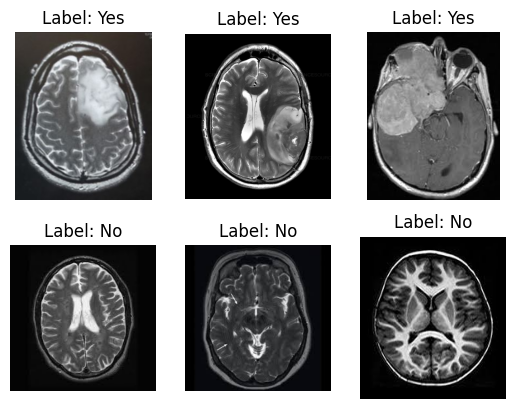

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms

# Define a transform to convert images to tensors
transform = transforms.ToTensor()

# Visualizing a few images from each category
for i in range(6):
    plt.subplot(2, 3, i+1)

    if i < 3:
        img_path = yes_images[i]
        label = 'Yes'
    else:
        img_path = no_images[i-3]
        label = 'No'

    # Load image and apply transformation to convert it to a tensor
    img = Image.open(img_path)
    img_tensor = transform(img)

    # permute the tensor dimensions to [Height, Width, Channels] for matplotlib
    plt.imshow(img_tensor.permute(1, 2, 0))
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.show()


In [8]:
yes_shapes = [Image.open(img).size for img in yes_images]
no_shapes = [Image.open(img).size for img in no_images]

# Find unique shapes
unique_yes_shapes = set(yes_shapes)
unique_no_shapes = set(no_shapes)

print(f"Unique shapes in 'Yes' images: {unique_yes_shapes}")
print(f"Unique shapes in 'No' images: {unique_no_shapes}")

Unique shapes in 'Yes' images: {(300, 325), (311, 355), (254, 312), (232, 309), (283, 357), (204, 247), (206, 244), (205, 246), (189, 173), (289, 315), (278, 324), (297, 359), (1061, 1280), (1059, 1200), (201, 251), (300, 336), (283, 295), (246, 310), (321, 352), (911, 938), (264, 336), (290, 355), (272, 350), (294, 380), (197, 255), (433, 520), (1275, 1427), (283, 334), (213, 236), (215, 233), (281, 352), (224, 245), (204, 251), (620, 620), (264, 338), (300, 359), (320, 355), (278, 349), (306, 365), (355, 450), (223, 303), (260, 331), (258, 279), (205, 243), (291, 340), (293, 337), (504, 630), (456, 519), (283, 338), (781, 960), (278, 351), (374, 456), (273, 318), (236, 278), (256, 256), (310, 355), (467, 586), (587, 630), (241, 286), (1024, 1024), (225, 225), (272, 331), (300, 347), (254, 325), (319, 360), (310, 366), (216, 234), (271, 307), (289, 300), (279, 354), (200, 210), (272, 324), (450, 446), (300, 349), (197, 256), (229, 270), (240, 300), (310, 380), (213, 237), (825, 993), 

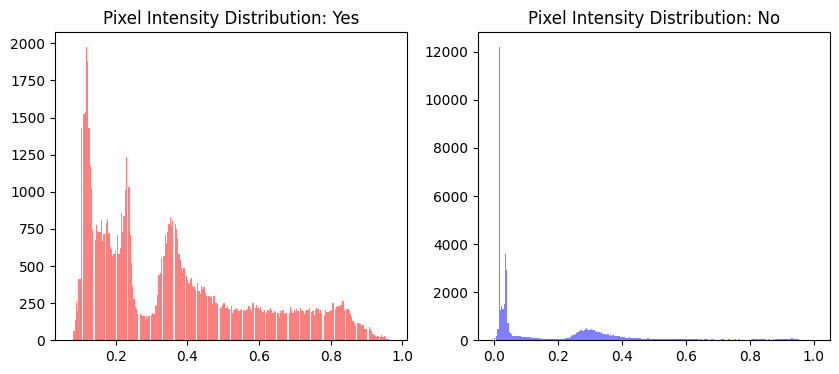

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

# Define a transform to convert images to grayscale tensors
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

# Load and convert the first images to grayscale tensors
yes_img = transform(Image.open(yes_images[0])).squeeze(0).numpy()  # Convert to numpy for plotting
no_img = transform(Image.open(no_images[0])).squeeze(0).numpy()    # Convert to numpy for plotting

# Plotting the pixel intensity distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(yes_img.ravel(), bins=256, color='red', alpha=0.5)
plt.title('Pixel Intensity Distribution: Yes')

plt.subplot(1, 2, 2)
plt.hist(no_img.ravel(), bins=256, color='blue', alpha=0.5)
plt.title('Pixel Intensity Distribution: No')

plt.show()


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image  # For image loading and processing
import os  # For handling directories and file paths


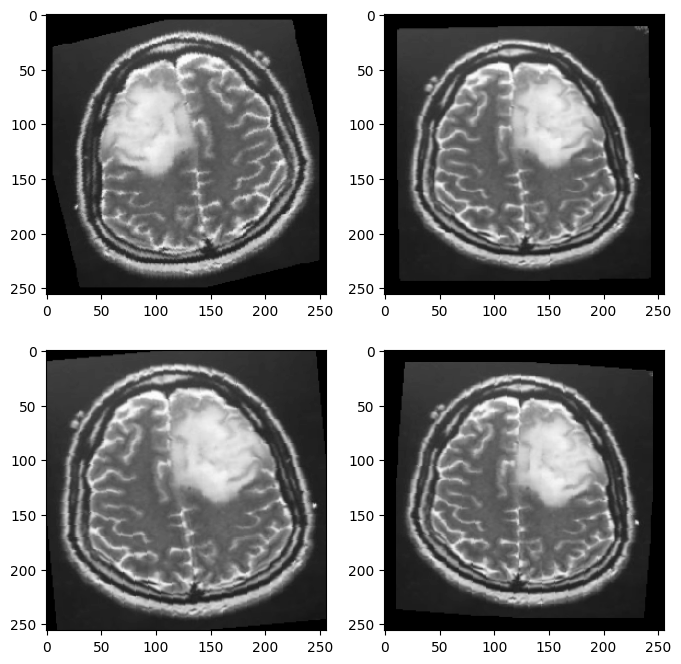

In [11]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Define transformations (equivalent to ImageDataGenerator)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((256, 256)),  # Resize if needed
    transforms.RandomRotation(15),  # Rotation augmentation
    transforms.RandomHorizontalFlip(),  # Horizontal flip augmentation
    transforms.RandomAffine(0, scale=(0.9, 1.1)),  # Zoom augmentation
    transforms.ToTensor()  # Convert to PyTorch tensor
])

# Load and process the image
img = Image.open(yes_images[0])

# Applying transformations and visualizing
i = 0
plt.figure(figsize=(8, 8))

for _ in range(4):  # Generate 4 augmented images
    augmented_img = transform(img)
    plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_img.squeeze(0), cmap='gray')
    i += 1

plt.show()


In [25]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm

# Define transformations for training (including augmentation)


# Define dataset path
data_dir = '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset'
augmented_dir = '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/Augment'

if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

# Define the transformations for offline augmentation
augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
])

# Loop through the original dataset and save augmented images
# Process each folder (yes/no) and save augmented images
# Process each folder (yes/no) and save augmented images
for class_folder in ['yes', 'no']:
    folder_path = os.path.join(data_dir, class_folder)
    augmented_class_folder = os.path.join(augmented_dir, class_folder)

    if not os.path.exists(augmented_class_folder):
        os.makedirs(augmented_class_folder)

    for img_name in tqdm(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, img_name)
        image = Image.open(img_path)

        # Check if the image is in RGBA or another mode, and convert it to RGB
        if image.mode != 'RGB':
            image = image.convert('RGB')
        # Save the original image in the augmented directory
        original_img_path = os.path.join(augmented_class_folder, f"{os.path.splitext(img_name)[0]}_orig.jpg")
        image.save(original_img_path, "JPEG")

        # Generate 5 augmented versions of each image
        for i in range(5):  # Increase this number for more images
            augmented_image = augment_transform(image)
            # Save the augmented image as a JPEG
            augmented_image.save(os.path.join(augmented_class_folder, f"{img_name}_aug_{i}.jpg"), "JPEG")



100%|██████████| 98/98 [00:09<00:00,  9.98it/s]


In [26]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# Path to the augmented dataset
augmented_data_dir = '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/Augment'

# Define the training transformations (with augmentations)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define validation transformations (no augmentations, just resizing and normalization)
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the augmented dataset with transformations
augmented_dataset = datasets.ImageFolder(augmented_data_dir, transform=train_transform)

# Split the dataset into training and validation sets (80-20 split)
train_size = int(0.8 * len(augmented_dataset))
val_size = len(augmented_dataset) - train_size
train_dataset, val_dataset = random_split(augmented_dataset, [train_size, val_size])

# Apply validation transformations to the validation dataset
val_dataset.dataset.transform = val_transform

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Optionally, verify the number of samples in each set
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")


Number of training samples: 1213
Number of validation samples: 304


In [27]:
!pip install torchsummary


In [31]:
import torch.nn as nn
import torchvision.models as models  # Import models from torchvision

class VGGModel(nn.Module):
    def __init__(self, num_classes=1):
        super(VGGModel, self).__init__()
        # Load the pre-trained VGG model
        vgg = models.vgg16(pretrained=True)  # You can choose other VGG variants

        # Freeze the weights of the pre-trained layers
        for param in vgg.parameters():
            param.requires_grad = False

        # Modify the classifier part for binary classification
        self.features = vgg.features  # Extract features from the pre-trained VGG
        self.classifier = nn.Sequential(
            nn.Linear(25088, 512),  # 25088 is the output size of VGG features
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.classifier(x)
        return torch.sigmoid(x)


In [32]:

model = VGGModel(num_classes=1)
model.to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 179MB/s]


New best model saved at epoch 1 with validation loss: 0.13184998352080585
Epoch 1/50
Train Loss: 0.09977074505111791, Train Accuracy: 96.29018961253091
Validation Loss: 0.13184998352080585, Validation Accuracy: 94.73684210526316
New best model saved at epoch 2 with validation loss: 0.09178034921642393
Epoch 2/50
Train Loss: 0.02667878120892534, Train Accuracy: 99.09315746084089
Validation Loss: 0.09178034921642393, Validation Accuracy: 97.36842105263158
New best model saved at epoch 3 with validation loss: 0.07768740139435977
Epoch 3/50
Train Loss: 0.020786920148805763, Train Accuracy: 99.25803792250618
Validation Loss: 0.07768740139435977, Validation Accuracy: 97.36842105263158
New best model saved at epoch 4 with validation loss: 0.06799167776480317
Epoch 4/50
Train Loss: 0.0047281358665235244, Train Accuracy: 99.91755976916735
Validation Loss: 0.06799167776480317, Validation Accuracy: 97.03947368421052
New best model saved at epoch 5 with validation loss: 0.0671166974469088
Epoch 5/

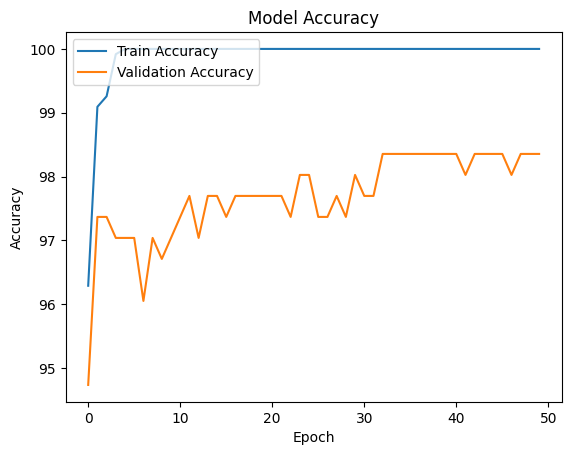

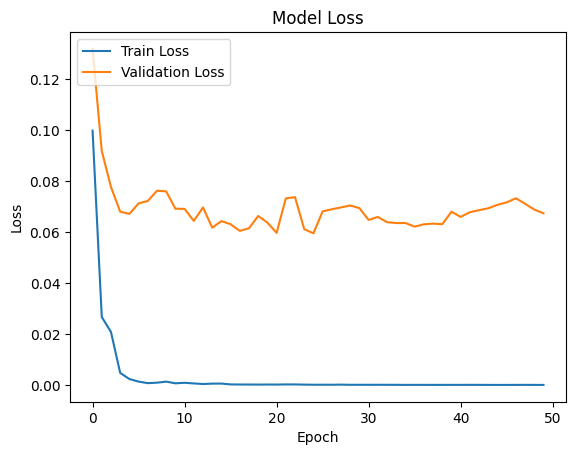

In [34]:
save_dir = '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/'

# Training and validation
num_epochs = 50
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

best_val_loss = float('inf')  # Start with a very high value for comparison

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs.squeeze() > 0.5).float()  # Sigmoid output to binary
        correct_train += (predicted == labels.to(device)).sum().item()
        total_train += labels.size(0)

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move inputs and labels to the device
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs.to(device))
            loss = criterion(outputs.squeeze(), labels.float())
            val_loss += loss.item()

            predicted = (outputs.squeeze() > 0.5).float()  # Sigmoid output to binary
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(100 * correct_val / total_val)

    # Check if current validation loss is the best so far
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        # Save the model with the best validation loss
        torch.save(model.state_dict(), os.path.join(save_dir, 'best_model.pth'))
        print(f"New best model saved at epoch {epoch + 1} with validation loss: {best_val_loss}")

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracies[-1]}")
    print(f"Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracies[-1]}")

# Plot training & validation accuracy values
plt.figure()
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [38]:
import torch
from torchvision import transforms, models
from PIL import Image
import random
import os
import torch.nn as nn
model_path = os.path.join(save_dir, 'best_model.pth')


# Load the model

model.load_state_dict(torch.load(model_path))
model.eval()

# Set device to GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the augmented dataset directory
augmented_data_dir = '/content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/Augment'


# Get the class folders ('yes' and 'no')
class_folders = ['yes', 'no']

# Choose a random class folder and image
random_class_folder = random.choice(class_folders)
folder_path = os.path.join(augmented_data_dir, random_class_folder)
random_image = random.choice(os.listdir(folder_path))
image_path = os.path.join(folder_path, random_image)

# Load and display the image
image = Image.open(image_path)
image.show()  # Optional
# Display the path of the image
print(f"Selected image path: {image_path}")

# Preprocessing
preprocess_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess the image
input_image = preprocess_transform(image)
input_image = input_image.unsqueeze(0).to(device)  # Add batch dimension

# Perform inference
with torch.no_grad():
    output = model(input_image)

# Interpret the result
prediction = torch.round(output).item()

if prediction == 1:
    class_label = 'yes (tumor detected)'
else:
    class_label = 'no (no tumor detected)'

print(f"Prediction: {class_label}")


<ipython-input-38-7b17dec65bca>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Selected image path: /content/drive/My Drive/Colab Notebooks/archive/brain_tumor_dataset/Augment/yes/Y252.jpg_aug_0.jpg
Prediction: yes (tumor detected)


In [ ]:
import torch
import torch.optim as optim
from itertools import product

# Define the parameter grid
param_grid = {
    'hidden_units': [64, 128, 256],
    'batch_size': [16, 32, 64],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Function to train the model and return validation loss
def train_and_evaluate(hidden_units, batch_size, learning_rate):
    # Create a new model for each combination of parameters
    model = VGGModel(num_classes=1)

    # Define loss function and optimizer
    criterion = torch.nn.BCELoss()  # Binary cross-entropy for binary classification
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    model.train()
    for epoch in range(5):  # Small number of epochs for testing
        for inputs, labels in train_loader:  # Assuming `train_loader` is predefined
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.float())
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation set
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:  # Assuming `val_loader` is predefined
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.float())
            val_loss += loss.item()

    # Return validation loss as a metric to compare models
    return val_loss / len(val_loader)


# Perform manual grid search
best_params = None
best_score = float('inf')

# Iterate over all combinations of hyperparameters
for hidden_units, batch_size, learning_rate in product(param_grid['hidden_units'],
                                                       param_grid['batch_size'],
                                                       param_grid['learning_rate']):
    print(f"Evaluating: hidden_units={hidden_units}, batch_size={batch_size}, learning_rate={learning_rate}")

    # Update DataLoader with the new batch size
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Train and evaluate the model with these parameters
    score = train_and_evaluate(hidden_units, batch_size, learning_rate)

    print(f"Validation loss: {score}")

    # Update the best parameters if the current score is better
    if score < best_score:
        best_score = score
        best_params = {
            'hidden_units': hidden_units,
            'batch_size': batch_size,
            'learning_rate': learning_rate
        }

print("Best Parameters:", best_params)
print("Best Validation Loss:", best_score)
